In [86]:
import pandas as pd

In [87]:
df = pd.read_csv("C:/Users/Admin/Desktop/Online Retail.csv", encoding='ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [88]:
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'],format="%d-%m-%Y %H:%M")

In [120]:
l=[]
for i in range(1,13):
    df1=df[(df['InvoiceDate'].dt.year==2011) & (df['InvoiceDate'].dt.month==i)]
    daily_data={}
    days_in_month=df1['InvoiceDate'].dt.day.unique()
    for day in days_in_month:
        daily_data[day]=df1[df1["InvoiceDate"].dt.day==day]
#     for day, data in daily_data.items():
#         print(f"Data for {day}, 2011:")
#         print(data, "\n")  
#     d1=pd.DataFrame(days_in_month,columns=['Invoice']) 
    d=[]
    for day in days_in_month:
        df3=daily_data[day]
        df3['revenue']=df3["UnitPrice"]*df3['Quantity']
        d.append(df3['revenue'].sum())
    
    l.append(sum(d))

C:\Users\Admin\AppData\Local\Temp\ipykernel_22540\723001168.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['revenue']=df3["UnitPrice"]*df3['Quantity']
C:\Users\Admin\AppData\Local\Temp\ipykernel_22540\723001168.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['revenue']=df3["UnitPrice"]*df3['Quantity']
C:\Users\Admin\AppData\Local\Temp\ipykernel_22540\723001168.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

In [125]:
import numpy as np
d1=np.array([1,2,3,4,5,6,7,8,9,10,11,12])
d1=pd.DataFrame(d1,columns=['Invoice Month'])
d1

,Invoice Month
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [126]:
d2=pd.DataFrame(l,columns=['revenue'])
d2

,revenue
0,560000.260
1,498062.650
2,683267.080
3,493207.121
4,723333.510
5,691123.120
6,681300.111
7,682680.510
8,1019687.622
9,1070704.670


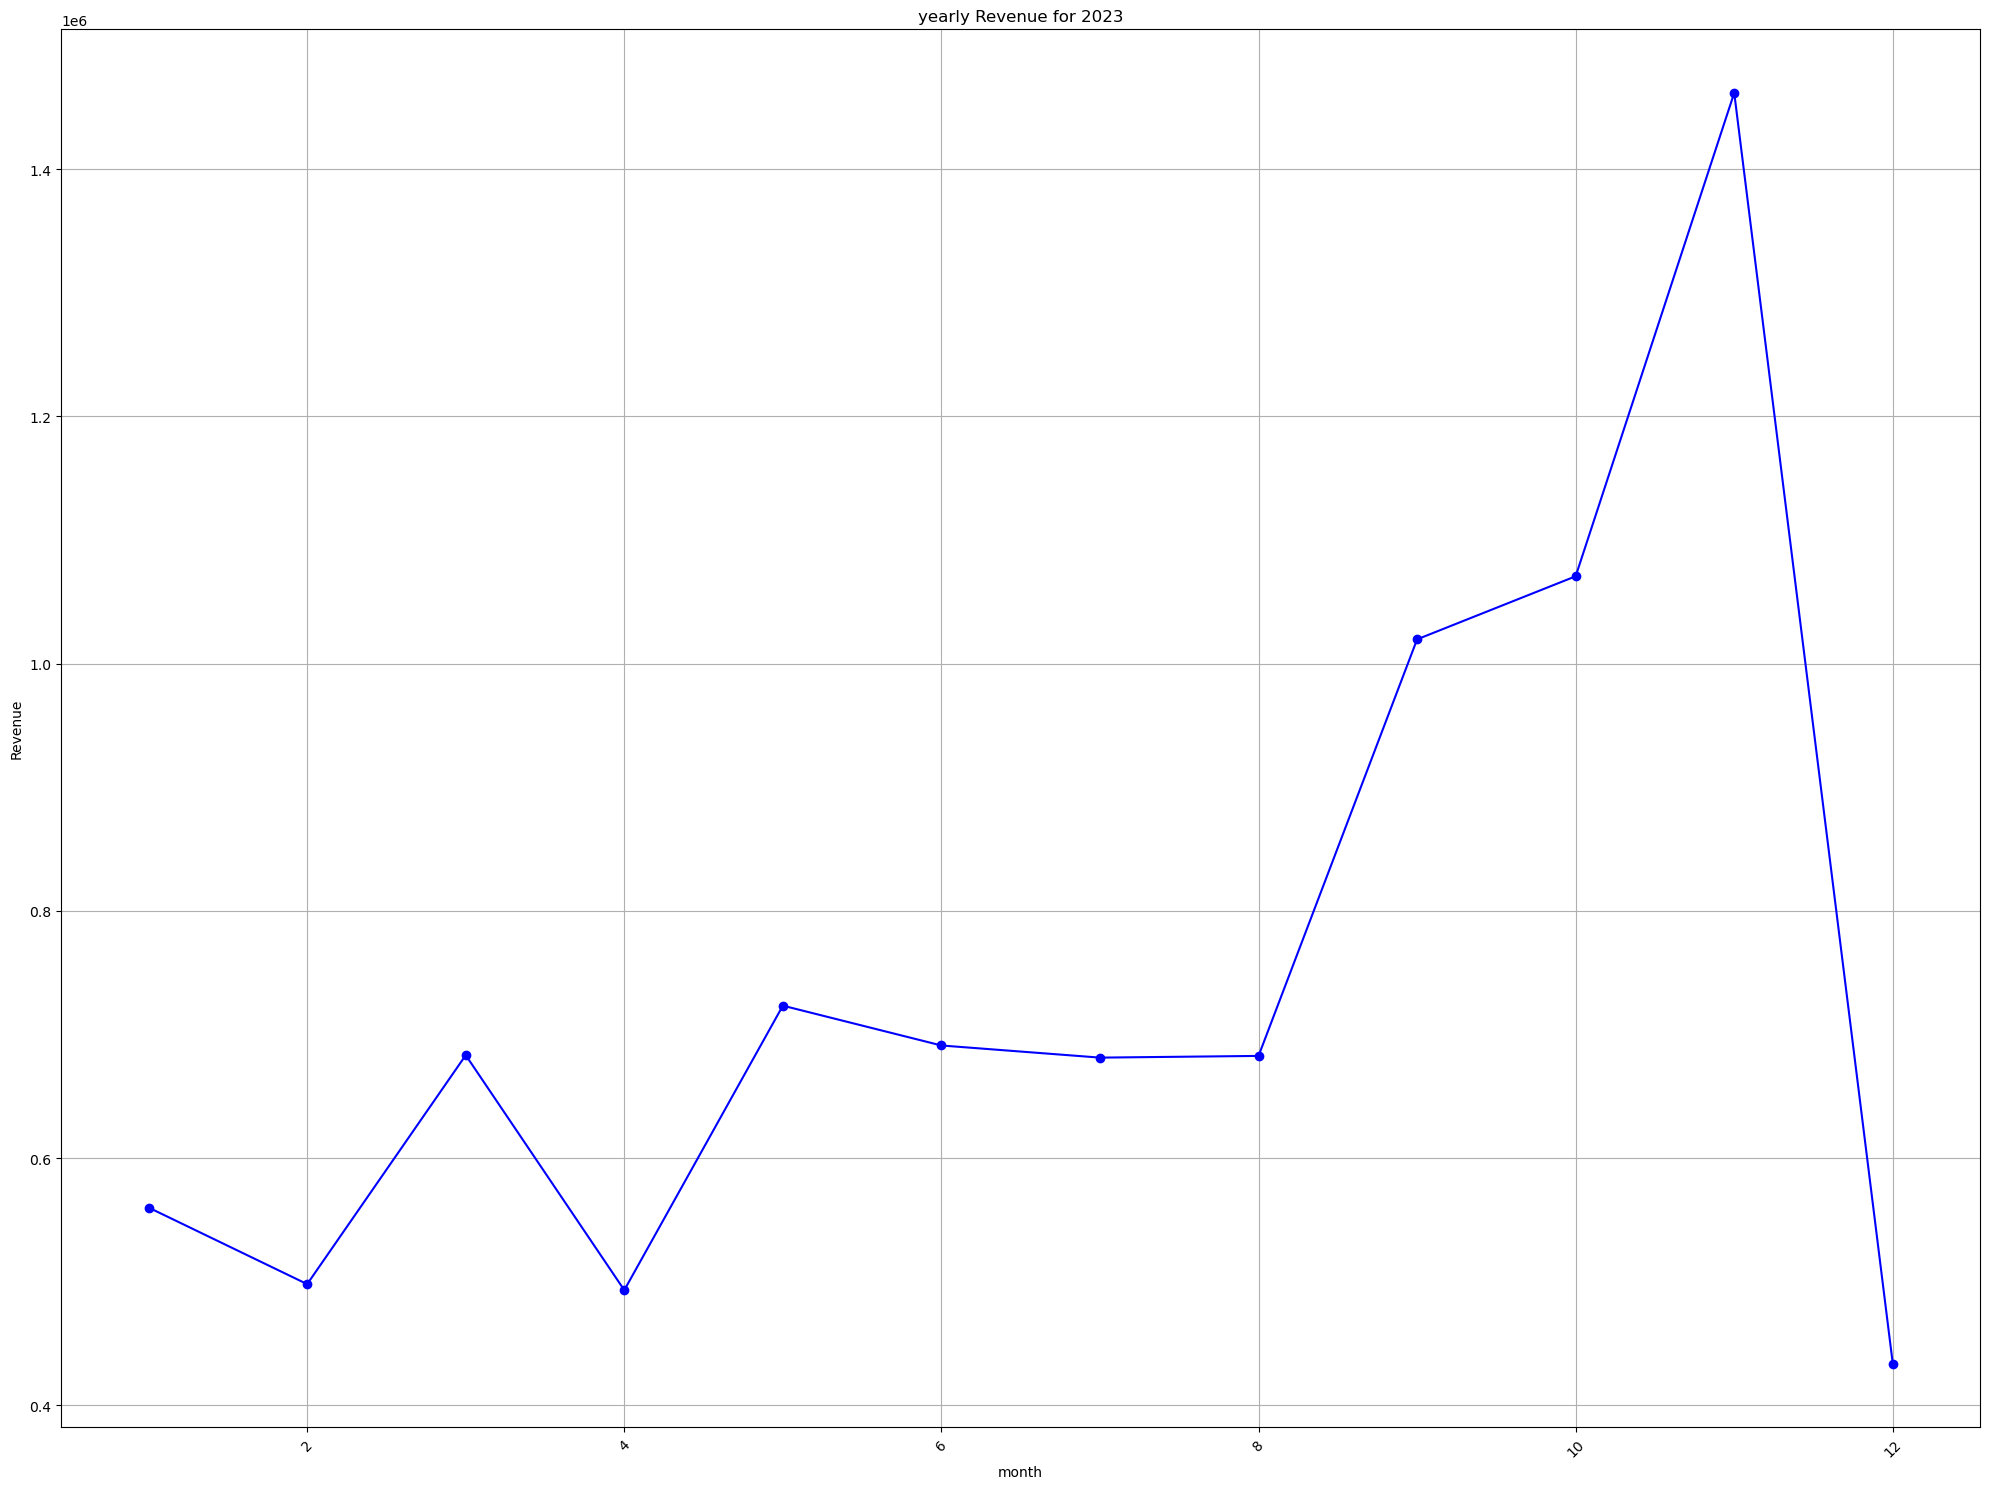

In [129]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(20,15))
plt.plot(d1,d2,marker='o',linestyle='-',color='b')
plt.title('yearly Revenue for 2023')
plt.xlabel('month')
plt.ylabel('Revenue')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()